# Riss 인기 학술자료 텍스트 마이닝

## 1. 사용할 패키지 설치

https://www.oracle.com/java/technologies/downloads/#jdk19-mac   
Java JDK 다운로드.   
konlpy를 사용하기 위해 필요.

에러 발생시 (M1)  
https://www.azul.com  
https://velog.io/@wijoonwu/맥북Mac-OS-M1-JDK-설치하기

In [1]:
!pip3 install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 11.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.9/140.9 kB 7.5 MB/s eta 0:00:00
  Using cached trio-0.22.0-py3-none-any.whl (384 kB)
  Using cached certifi-2022.12.7-py3-none-any.whl (155 kB)
  Using cached sortedcontainers-2.4.0-py2.py3-none-any.whl (29 kB)
  Using cached async_generator-1.10-py3-none-any.whl (18 kB)
  Using cached outcome-1.2.0-py2.py3-none-any.whl (9.7 kB)
  Using cached wsproto-1.2.0-py3-none-any.whl (24 kB)
  Using cached PySocks-1.7.1-py3-none-any.whl (16 kB)
  Using cached h11-0.14.0-py3-none-any.whl (58 kB)

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [2]:
!pip3 install jpype1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.2/590.2 kB 725.9 kB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [3]:
!pip3 install konlpy

  Using cached konlpy-0.6.0-py2.py3-none-any.whl (19.4 MB)
  Using cached lxml-4.9.2.tar.gz (3.7 MB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 3.0 MB/s eta 0:00:0000:0100:01
  Created wheel for lxml: filename=lxml-4.9.2-cp311-cp311-macosx_13_0_arm64.whl size=1641941 sha256=93c063733a04ae816d1710e39595b078db168149a0b9f481b0dc005fb377ed7d
  Stored in directory: /Users/uuu9/Library/Caches/pip/wheels/fb/5b/f7/0a27880b4a007daeff53a196d01901627f640392b7e76e76e5
Successfully built lxml

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


## 2. 사용할 패키지 호출

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By

## 3. 프로그래밍

In [2]:
# webdriver 실행 후 riss 이동
browser = webdriver.Chrome()
browser.get("http://www.riss.kr/PopularList.do") 

In [3]:
# 현제 제공되고 있는 인기 학술자료 목록이 사용된 기간을 저장한다.
span1 = browser.find_element(By.CLASS_NAME, 'periodSpan1').text
span2 = browser.find_element(By.CLASS_NAME, 'periodSpan2').text
data_date = (span1 + "~" +span2)
data_date

'2023.4.16~2023.5.13'

In [4]:
# 페이지의 자료 확장
browser.find_element(By.ID, 'nextList').click()

In [5]:
thesis_data = browser.find_elements(By.TAG_NAME, 'tr')

csv = open(f"csv/{data_date}.csv", "a")
csv.write("논문 제목, 링크\n")
csv.close()

for thesis_data_sort in thesis_data:
    thesis_titles = thesis_data_sort.find_elements(By.CLASS_NAME, 'title')
    
    for thesis_title_data in thesis_titles:
        title = thesis_title_data.text
        link = thesis_title_data.get_attribute("href")
        
        csv = open(f"csv/{data_date}.csv", "a")
        csv.write(f"{title}, {link}\n")
        csv.close()
        
        file = open(f"txt/{data_date}.txt", "a")
        file.write(f"{title}\n")
        file.close()

In [6]:
# 저장한 텍스트 파일 읽어오기
file_data = open(f"txt/{data_date}.txt", encoding= "UTF-8").read()
file_data

'미래 사회에서 메타버스 교육의 방향\n사형제도는 폐지되어야 하는가?\n챗GPT 충격파… 성큼 다가온 인공지능\n스트레스 수준이 대학생들의 학업 성취도에 미치는 영향\n촉법소년 상한(형사미성년자) 연령 하향에 대한 비판적 고찰\n챗GPT에 빼앗긴 밥그릇\n노키즈존 확산, 어떻게 볼 것인가?\n대리모 산업의 윤리적 문제와 해결방안\n[토론문 1] 저출산·고령화와 인구정책\n국내외 가짜뉴스(Fake News)에 대한 뉴스 공정성 연구논의 탐색\n구글 시대 저무나? 인공지능 ‘챗GPT’ 돌풍\nMZ 세대의 개인주의 문화, 어떻게 볼 것인가?\n헤어질 결심\n촉법소년 상한연령 하향 인식에의 영향요인 - 소년사법 실무전문가들을 중심으로 -\n최저임금제도 개선방안에 관한 연구\n고교학점제의 쟁점과 과제 분석\n영화 속에서 나타난 인공지능의 인간화와 인간지배 현상 연구 - 신체가 있는 인공지능과 하이퍼 인공지능을 중심으로\n인지발달에 대한 삐아제 이론과 비고츠키 이론의 비교\n챗봇 기반 인공지능 교육 프로그램 개발과 적용\n사상체질과 MBTI성격유형검사를 통한 대학생 건강염려증의 상관관계연구\n나이팅게일과 업적\n사회복지에서의 인권에 관한 일 고찰\n행동주의 상담과 인본주의 상담의 특성 비교\n다이어트, 당신은 건강합니까?\n한국 인공지능 교육의 방향\n고교학점제 도입 추진 정책에 대한 비판적 검토\n간호관리자의 변혁적 리더십과 서번트 리더십이 신규간호사의 조직사회화에 미치는 영향: 집단효능감의 매개 효과\n예비 초등 교사들의 역사 인물 프로젝트-이순신을 중심으로-\n학술 2 - 유기동물 안락사의 윤리적 고찰과 사례를 통한 발전적 해결방안\nMZ세대의 MBTI에 따른 여가활동 선택과 여가태도\n자동창작시대의 예술 작품 -인공지능은 예술 창작의 주체가 될 수 있는가?\n음악치료 소개와 음악이란 매개체가 갖는 특별한 우수성\n미혼 성인남녀의 저출산 정책 인식에 관한 연구\nThe Impact of Employees\' Growth Mindset on Organizational

In [7]:
# 불필요한 문자 제거
# '[^가-힣]' : 한글이 아닌 모든 문자
import re
file_data = re.sub('[^가-힣]', ' ', file_data)
file_data

'미래 사회에서 메타버스 교육의 방향 사형제도는 폐지되어야 하는가  챗    충격파  성큼 다가온 인공지능 스트레스 수준이 대학생들의 학업 성취도에 미치는 영향 촉법소년 상한 형사미성년자  연령 하향에 대한 비판적 고찰 챗   에 빼앗긴 밥그릇 노키즈존 확산  어떻게 볼 것인가  대리모 산업의 윤리적 문제와 해결방안  토론문    저출산 고령화와 인구정책 국내외 가짜뉴스           에 대한 뉴스 공정성 연구논의 탐색 구글 시대 저무나  인공지능  챗     돌풍    세대의 개인주의 문화  어떻게 볼 것인가  헤어질 결심 촉법소년 상한연령 하향 인식에의 영향요인   소년사법 실무전문가들을 중심으로   최저임금제도 개선방안에 관한 연구 고교학점제의 쟁점과 과제 분석 영화 속에서 나타난 인공지능의 인간화와 인간지배 현상 연구   신체가 있는 인공지능과 하이퍼 인공지능을 중심으로 인지발달에 대한 삐아제 이론과 비고츠키 이론의 비교 챗봇 기반 인공지능 교육 프로그램 개발과 적용 사상체질과     성격유형검사를 통한 대학생 건강염려증의 상관관계연구 나이팅게일과 업적 사회복지에서의 인권에 관한 일 고찰 행동주의 상담과 인본주의 상담의 특성 비교 다이어트  당신은 건강합니까  한국 인공지능 교육의 방향 고교학점제 도입 추진 정책에 대한 비판적 검토 간호관리자의 변혁적 리더십과 서번트 리더십이 신규간호사의 조직사회화에 미치는 영향  집단효능감의 매개 효과 예비 초등 교사들의 역사 인물 프로젝트 이순신을 중심으로  학술     유기동물 안락사의 윤리적 고찰과 사례를 통한 발전적 해결방안   세대의     에 따른 여가활동 선택과 여가태도 자동창작시대의 예술 작품  인공지능은 예술 창작의 주체가 될 수 있는가  음악치료 소개와 음악이란 매개체가 갖는 특별한 우수성 미혼 성인남녀의 저출산 정책 인식에 관한 연구                                                                                            

#### m1 맥에서 jvm을 제대로 찾지 못하는 이슈가 있었음.
#### 맨 위의 링크를 통해 설치하고 경로를 직접 설정
#### https://github.com/konlpy/konlpy/issues/353 해당 페이지 참조

In [8]:
# 명사 추출
import konlpy
JVM_PATH = '/Library/Java/JavaVirtualMachines/zulu-11.jdk/Contents/Home/bin/java'


hannanum = konlpy.tag.Hannanum(jvmpath=JVM_PATH)
nouns_data = hannanum.nouns(file_data)
print(nouns_data)


['미래', '사회', '메타버스', '교육', '방향', '사형제도', '폐', '챗', '충격파', '인공지능', '스트레스', '수준', '대학생들', '학업', '성취도', '영향', '촉법소년', '형사미성년자', '연령', '하향', '비판적', '고찰', '챗', '밥그릇', '노키즈존', '확산', '것', '대리모', '산업', '윤리적', '문제', '해결방안', '토론문', '저출산', '고령화', '인구정책', '국내외', '가짜뉴스', '뉴스', '공정성', '연구논', '탐색', '구글', '시대', '인공지능', '챗', '돌풍', '세대', '개인주의', '문화', '것', '결심', '촉법소년', '상한연령', '하향', '식', '영향요', '소년사법', '실무전문가들', '중심', '최저임금제', '개선방안', '연구', '고교학점제', '쟁점', '과제', '분석', '영화', '속', '인공지능', '인간화', '인간지배', '현상', '연구', '신체', '인공지능', '하이퍼', '인공지능', '중심', '인지발달', '삐아제', '이론', '비고츠키', '이론', '비교', '챗봇', '기반', '인공지능', '교육', '프로그램', '개발', '적용', '사상체질', '성격유형검사', '대학생', '건강염려증', '상관관계연구', '나이팅게일', '업적', '사회복지', '인권', '일', '고찰', '행동주의', '상담', '인본주의', '상담', '특성', '비교', '다이어트', '당신', '건강', '한국', '인공지능', '교육', '방향', '고교학점제', '도입', '추진', '정책', '비판적', '검토', '간호관리자', '변혁적', '리더십', '서번트', '리더십', '신규간호사', '조직사회화', '영향', '집단효능감', '매개', '효과', '예비', '초등', '교사', '역사', '인물', '프로젝트', '이순신', '중심', '학술', '유기동물', '안락사', '윤리적', '고찰', 

In [9]:
import pandas as pd
df_word = pd.DataFrame({'word' : nouns_data})
df_word

,word
0,미래
1,사회
2,메타버스
3,교육
4,방향
...,...
548,인공지능
549,기술
550,철학적
551,분석


In [10]:
df_word['count'] = df_word['word'].str.len()
df_word

,word,count
0,미래,2
1,사회,2
2,메타버스,4
3,교육,2
4,방향,2
...,...,...
548,인공지능,4
549,기술,2
550,철학적,3
551,분석,2


In [11]:
df_word = df_word.groupby('word', as_index=False)\
    .agg(n = ('word', 'count'))\
        .sort_values('n', ascending=False)
df_word

,word,n
250,인공지능,23
209,연구,18
34,교육,9
130,분석,8
283,정책,6
...,...,...
141,사상체질,1
138,삐아제,1
137,빈곤아동,1
134,비용,1


In [12]:
# 단어 빈도 막대 그래프
top20 = df_word.head(20)

In [13]:
!pip3 install seaborn


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


<AxesSubplot: xlabel='n', ylabel='word'>

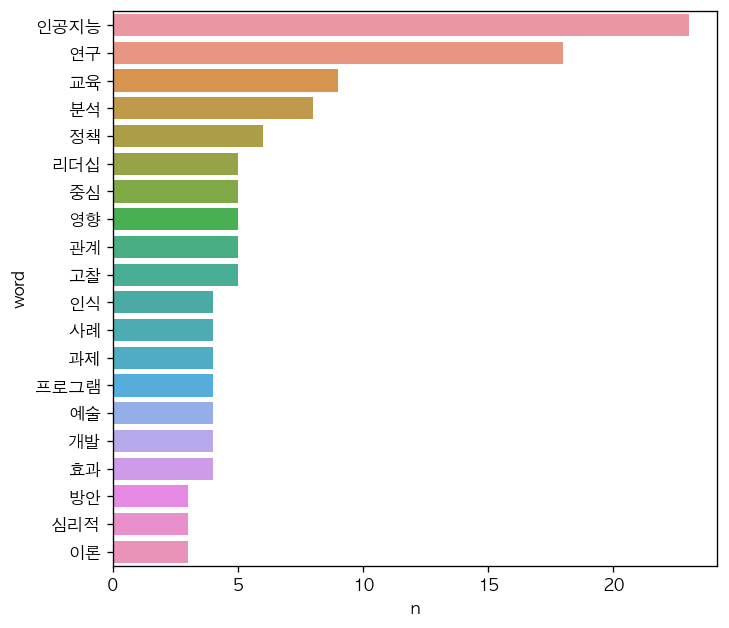

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# 폰트의 경우 
# https://github.com/GUuu9/Nas_Docker_jupyter_Ko_fonts
# 해당 페이지을 참고하여 폰트 설정

plt.rcParams.update({'font.family' : 'AppleGothic',
                    'figure.dpi' : '120',
                    'figure.figsize' : [6.5, 6]})

bar_data = sns.barplot(data = top20, y = 'word', x= 'n')
plt.savefig(f'barplot/{data_date}.png', dpi=300)
bar_data

In [15]:
# 워드 클라우드 생성
!pip3 install wordcloud


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [16]:
dic_word = df_word.set_index('word').to_dict()['n']
dic_word

{'인공지능': 23,
 '연구': 18,
 '교육': 9,
 '분석': 8,
 '정책': 6,
 '리더십': 5,
 '중심': 5,
 '영향': 5,
 '관계': 5,
 '고찰': 5,
 '인식': 4,
 '사례': 4,
 '과제': 4,
 '프로그램': 4,
 '예술': 4,
 '개발': 4,
 '효과': 4,
 '방안': 3,
 '심리적': 3,
 '이론': 3,
 '방향': 3,
 '상담': 3,
 '현황': 3,
 '디지털': 3,
 '기반': 3,
 '시사점': 3,
 '저출산': 3,
 '챗': 3,
 '의': 2,
 '사회': 2,
 '노키즈존': 2,
 '세대': 2,
 '다이어트': 2,
 '카페': 2,
 '예비': 2,
 '수': 2,
 '사회적': 2,
 '사례연구': 2,
 '임파워먼트': 2,
 '대응': 2,
 '나이팅게일': 2,
 '성공': 2,
 '인지행동놀이치료': 2,
 '촉법소년': 2,
 '초등학생': 2,
 '동향': 2,
 '비교': 2,
 '또래': 2,
 '차': 2,
 '창의성': 2,
 '적용': 2,
 '활용': 2,
 '창작': 2,
 '스트레스': 2,
 '국내외': 2,
 '현상': 2,
 '것': 2,
 '경험': 2,
 '비판': 2,
 '고교학점제': 2,
 '변화': 2,
 '확산': 2,
 '행동': 2,
 '비판적': 2,
 '개선방안': 2,
 '해결방안': 2,
 '교양교육': 2,
 '윤리': 2,
 '실험': 2,
 '아동': 2,
 '하향': 2,
 '피지컬': 2,
 '시대': 2,
 '기술': 2,
 '마약': 2,
 '식': 2,
 '윤리적': 2,
 '역량': 2,
 '음반': 2,
 '쟁점': 1,
 '자기결정권': 1,
 '인지발달': 1,
 '장기이식': 1,
 '자동창작시대': 1,
 '일': 1,
 '인슐린': 1,
 '일본': 1,
 '작품': 1,
 '자아존중감': 1,
 '자연': 1,
 '작동': 1,
 '저항성': 1,
 '가능성': 1,
 '인본주의': 1

In [17]:
from wordcloud import WordCloud
we = WordCloud(random_state = 1234,
              font_path = 'AppleGothic',
              width = 400,
              height = 400,
              background_color = 'white')

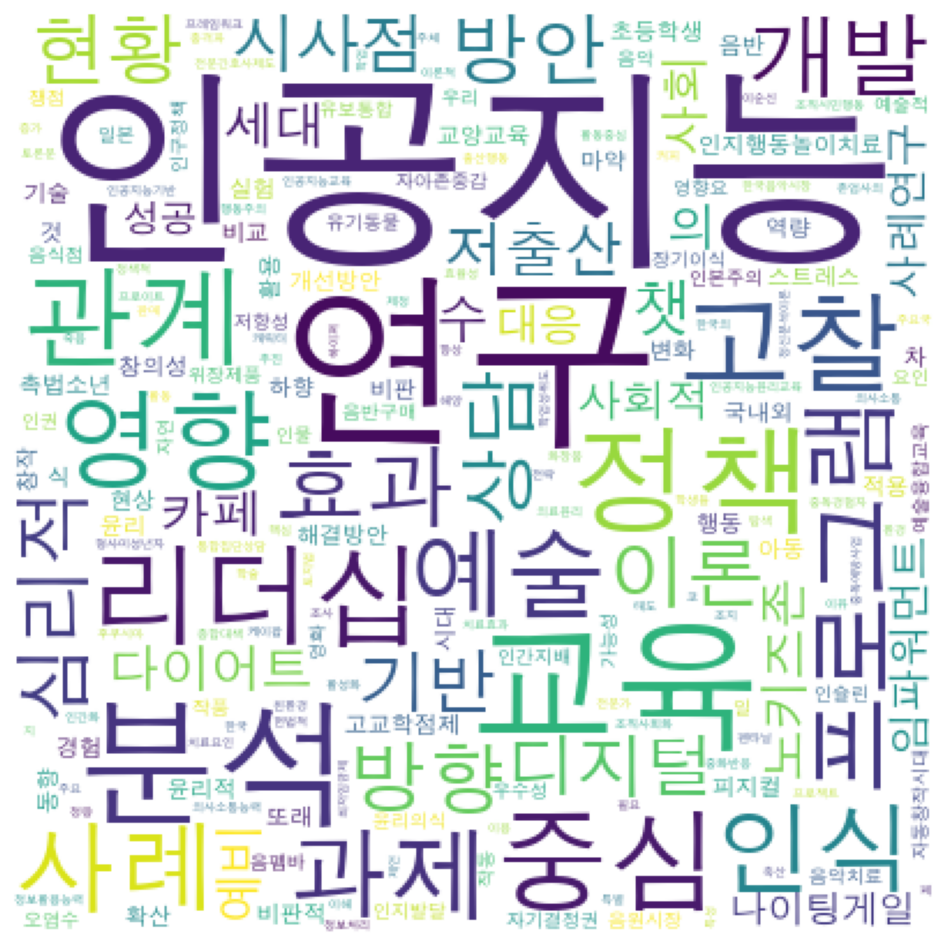

In [18]:
img_wordcloud = we.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10))
plt.axis('off')
img_wordcloud = plt.imshow(img_wordcloud)
plt.savefig(f'wordcloud/{data_date}.png', dpi=300)
img_wordcloud

➜Riss_Popular_thesis_wordCloud git:(main) ✗ git init  
Reinitialized existing Git repository in /Users/uuu9/GIT/Riss_Popular_thesis_wordCloud/.git/  

➜  Riss_Popular_thesis_wordCloud git:(main) ✗ git add .  

➜  Riss_Popular_thesis_wordCloud git:(main) ✗ git commit -m "init commit"  
[main d8ae137] init commit  
 6 files changed, 537 insertions(+), 334 deletions(-)  
 create mode 100644 barplot/2023.3.5~2023.4.1.png  
 create mode 100644 csv/2023.3.5~2023.4.1.csv  
 create mode 100644 txt/2023.3.5~2023.4.1.txt  
 create mode 100644 wordcloud/2023.3.5~2023.4.1.png  
➜  Riss_Popular_thesis_wordCloud git:(main) git branch -M main  

➜  Riss_Popular_thesis_wordCloud git:(main) git push origin main  
Enumerating objects: 19, done.  
Counting objects: 100% (19/19), done.  
Delta compression using up to 10 threads  
Compressing objects: 100% (12/12), done.  
Writing objects: 100% (12/12), 900.67 KiB | 19.58 MiB/s, done.  
Total 12 (delta 6), reused 0 (delta 0), pack-reused 0  
remote: Resolving deltas: 100% (6/6), completed with 5 local objects.  
To https://github.com/GUuu9/Riss_Popular_thesis_wordCloud.git  
   5137005..d8ae137  main -> main  

에러 발생시
git push -f origin 명령으로 강제 업로드